In [2]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import pandas_datareader.data as web
from datetime import datetime

now_time = datetime.now()
start_time = datetime(now_time.year - 20, now_time.month , now_time.day)
now_time
start_time


In [3]:
now_time = datetime.now()
start_time = datetime(now_time.year - 5, now_time.month , now_time.day)
now_time
start_time

datetime.datetime(2015, 1, 11, 0, 0)

In [4]:
stock_df = web.DataReader('AAPL','yahoo', start_time, now_time)

In [5]:
#start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

#sp_df=web.DataReader('^GSPC','yahoo', start_time, now_time)    

In [7]:
stock_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,299.799988
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,298.390015
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,303.190002
2020-01-09,310.429993,306.200012,307.239990,309.630005,42527100.0,309.630005
2020-01-10,312.670013,308.250000,310.600006,310.329987,35217272.0,310.329987


In [8]:
stock_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,299.799988
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,298.390015
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,303.190002
2020-01-09,310.429993,306.200012,307.239990,309.630005,42527100.0,309.630005
2020-01-10,312.670013,308.250000,310.600006,310.329987,35217272.0,310.329987


In [9]:
# Get the Adjusted Close Price

df = stock_df[['Open','Adj Close']]
#Take a look at the new data
df.head() 

#df.to_csv('data_stocks.csv')

,Open,Adj Close
Date,,
2015-01-12,112.599998,100.380791
2015-01-13,111.430000,101.272049
2015-01-14,109.040001,100.886154
2015-01-15,110.000000,98.148056
2015-01-16,107.029999,97.385445


In [10]:
df.tail() 

,Open,Adj Close
Date,,
2020-01-06,293.790009,299.799988
2020-01-07,299.839996,298.390015
2020-01-08,297.160004,303.190002
2020-01-09,307.239990,309.630005
2020-01-10,310.600006,310.329987


In [11]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days
#Create another column (the target or dependent variable) shifted 'n' units up
#df['InitialPrediction'] = df[['Adj Close']].shift()
#df['Prediction'] = df[['Adj Close']].shift(-forecast_out)
#print the new data set
df.head(30) 

,Open,Adj Close
Date,,
2015-01-12,112.599998,100.380791
2015-01-13,111.430000,101.272049
2015-01-14,109.040001,100.886154
2015-01-15,110.000000,98.148056
2015-01-16,107.029999,97.385445
2015-01-20,107.839996,99.893822
2015-01-21,108.949997,100.656441
2015-01-22,110.260002,103.275063
2015-01-23,112.300003,103.807991


In [12]:
df.tail()

,Open,Adj Close
Date,,
2020-01-06,293.790009,299.799988
2020-01-07,299.839996,298.390015
2020-01-08,297.160004,303.190002
2020-01-09,307.239990,309.630005
2020-01-10,310.600006,310.329987


In [13]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Adj Close'],1))

#Remove the last 'n' rows
X = X[:-forecast_out]
print(X)

[[112.59999847]
 [111.43000031]
 [109.04000092]
 ...
 [262.58999634]
 [262.70999146]
 [266.94000244]]


In [14]:
df.head()

,Open,Adj Close
Date,,
2015-01-12,112.599998,100.380791
2015-01-13,111.430000,101.272049
2015-01-14,109.040001,100.886154
2015-01-15,110.000000,98.148056
2015-01-16,107.029999,97.385445


In [15]:
df.tail()

,Open,Adj Close
Date,,
2020-01-06,293.790009,299.799988
2020-01-07,299.839996,298.390015
2020-01-08,297.160004,303.190002
2020-01-09,307.239990,309.630005
2020-01-10,310.600006,310.329987


In [16]:
## Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array (All of the values including the NaN's)
y = np.array(df['Adj Close'])
# Get all of the y values except the last 'n' rows
y = y[:-forecast_out]
print(y[:-forecast_out])




[100.38079071 101.27204895 100.88615417 ... 235.50296021 235.16397095
 234.6156311 ]


In [17]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [18]:
# Create and train the Support Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [19]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9959454311306708


In [20]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)


lr confidence:  0.9966375368815139


In [22]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Adj Close'],1))[-forecast_out:]
print(x_forecast) 

[[265.57998657]
 [266.6000061 ]
 [267.26998901]
 [258.30999756]
 [261.07000732]
 [263.79000854]
 [267.48001099]
 [270.        ]
 [268.6000061 ]
 [268.80999756]
 [267.77999878]
 [271.45999146]
 [277.        ]
 [279.57000732]
 [279.79998779]
 [279.5       ]
 [282.23001099]
 [280.52999878]
 [284.69000244]
 [284.82000732]
 [291.11999512]
 [289.45999146]
 [289.92999268]
 [296.23999023]
 [297.1499939 ]
 [293.79000854]
 [299.83999634]
 [297.16000366]
 [307.23999023]
 [310.6000061 ]]


# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
#x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast[0])

In [23]:
# Print linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)
lr_pdf=pd.DataFrame(lr_prediction)
lr_pdf

[265.35607811 266.41921269 267.117515   257.77879504 260.65546724
 263.49043977 267.33641436 269.96292041 268.50375038 268.72261793
 267.64908229 271.48462402 277.25880234 279.93744091 280.17714239
 279.86447445 282.70987986 280.93801009 285.27385232 285.40935235
 291.97563337 290.24546327 290.7353309  297.31204478 298.26051324
 294.75850519 301.06421899 298.27094611 308.7770021  312.27904196]


,0
0,265.356078
1,266.419213
2,267.117515
3,257.778795
4,260.655467
5,263.490440
6,267.336414
7,269.962920
8,268.503750
9,268.722618


In [24]:
df.tail()

,Open,Adj Close
Date,,
2020-01-06,293.790009,299.799988
2020-01-07,299.839996,298.390015
2020-01-08,297.160004,303.190002
2020-01-09,307.239990,309.630005
2020-01-10,310.600006,310.329987


In [25]:
df.tail()

,Open,Adj Close
Date,,
2020-01-06,293.790009,299.799988
2020-01-07,299.839996,298.390015
2020-01-08,297.160004,303.190002
2020-01-09,307.239990,309.630005
2020-01-10,310.600006,310.329987


In [26]:
df.tail()

,Open,Adj Close
Date,,
2020-01-06,293.790009,299.799988
2020-01-07,299.839996,298.390015
2020-01-08,297.160004,303.190002
2020-01-09,307.239990,309.630005
2020-01-10,310.600006,310.329987


In [27]:
#Error 
from sklearn.metrics import mean_squared_error,r2_score
#df['InitialPrediction'] = df[['Adj Close']].shift()
Y_orginal= np.array(df.drop(['Open'],1))
Y_true=Y_orginal[-30:]
Y_pred=lr_prediction
#mean_squared_error(Y_orginal[-30:], lr_prediction)
MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
MSE 

rmse=r2_score(Y_true, Y_pred)
rmse

0.9664740819839303

In [28]:
# Print support vector regressor model predictions for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction) 

[263.0703814  263.63803619 265.22783353 259.06608691 264.46805155
 262.65355455 265.70782535 243.48676778 264.0788877  262.43559834
 266.14477791 209.43205868 174.14799208 174.10369472 174.10359957
 174.10373482 174.10346617 174.10348852 174.10346593 174.10346593
 174.10346593 174.10346593 174.10346593 174.10346593 174.10346593
 174.10346593 174.10346593 174.10346593 174.10346593 174.10346593]


In [29]:
dt=datetime.today().strftime('%Y-%m-%d')

df.tail(30) 
new_df= df.tail(30) 
new_df['Prediction']=lr_prediction

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [30]:
new_df.head()


,Open,Adj Close,Prediction
Date,,,
2019-11-27,265.579987,267.839996,265.356078
2019-11-29,266.600006,267.250000,266.419213
2019-12-02,267.269989,264.160004,267.117515
2019-12-03,258.309998,259.450012,257.778795
2019-12-04,261.070007,261.739990,260.655467


([<matplotlib.axis.XTick at 0x1305049b0>,
 <a list of 30 Text xticklabel objects>)

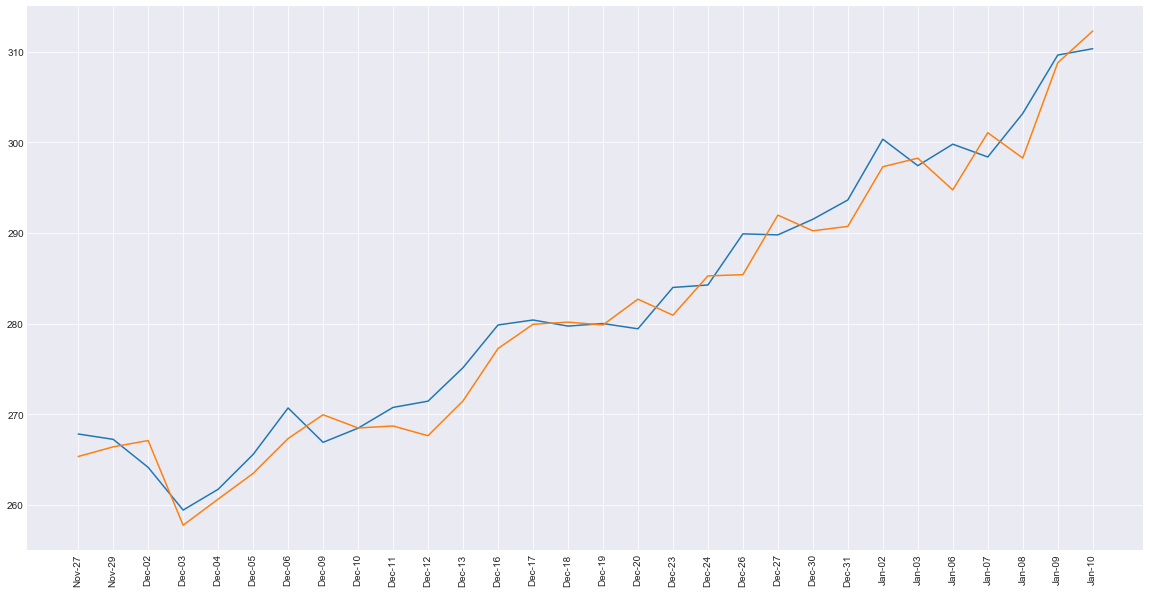

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
 
plt.rc('figure', figsize=(20, 10))
# create a color palette
#plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
x = new_df.index
labels=x.strftime("%b-%d")
ax.plot(x.strftime("%b-%d"), new_df['Adj Close']);
ax.plot(x.strftime("%b-%d"), new_df['Prediction']); 
plt.xticks(x.strftime("%b-%d"), labels, rotation='vertical')

In [30]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json 
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [31]:
# Sort DataFrame by date
df = df.sort_values('Adj Close')
# df = df.reset_index()
# Double check the result
df.head()


,Adj Close,Prediction
Date,,
1997-12-23,0.402033,0.574888
1997-07-02,0.405918,0.714726
1997-12-24,0.407860,0.596252
1997-12-29,0.407860,0.590426
1997-12-31,0.407860,0.605963


In [36]:
from datetime import date
from datetime import datetime
from datetime import timedelta
today = str(datetime.now())
last_30_days = datetime.now() - timedelta(days=30)
last_30_days = str(last_30_days)

In [37]:

dates = df.loc[last_30_days : today]
dates

,Adj Close,Prediction
Date,,
2019-12-13,275.149994,283.702739
2019-12-20,279.440002,288.125471
2019-12-18,279.739990,288.434740
2019-12-16,279.859985,288.558447
2019-12-19,280.019989,288.723401
2019-12-17,280.410004,289.125482
2019-12-23,284.000000,292.826545
2019-12-24,284.269989,293.104887
2019-12-27,289.799988,298.805972


In [41]:
# plt.figure(figsize = (18,9))

dates.plot(kind = 'line')
# plt.plot(range(df.shape[0]),(df['Adj Close'])
#plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel[('Adj Close',fontsize=18)
plt.ylabel('Predictions',fontsize=18)
plt.show()

SyntaxError: invalid syntax (<ipython-input-41-5d8e1659c1bc>, line 6)

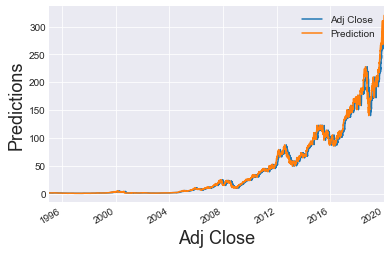

In [39]:
df.plot(kind = 'line')
# plt.plot(range(df.shape[0]),(df['Adj Close'])
#plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Adj Close',fontsize=18)
plt.ylabel('Predictions',fontsize=18)
plt.show()